Import Library

In [1]:
#import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = 'https://drive.google.com/uc?id=1HwJfVCfrKCx7A9qbzBgLK0YKIOH9rEO_'
data_1 = pd.read_csv(url)

### Exploratory Data Analysis

In [4]:
data_1.head(6)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
5,overweight,male,vegetarian,less frequently,wood,public,NaN,sometimes,144,frequently,658,large,1,22,18,9,Sometimes,"['Paper', 'Glass', 'Metal']","['Stove', 'Oven', 'Microwave']",1647


In [5]:
data_1.shape

(10000, 20)

In [6]:
data_1.columns

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission'],
      dtype='object')

In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [8]:
data_1.isnull().sum()

,0
Body Type,0
Sex,0
Diet,0
How Often Shower,0
Heating Energy Source,0
Transport,0
Vehicle Type,6721
Social Activity,0
Monthly Grocery Bill,0
Frequency of Traveling by Air,0


Mengatasi Missing Value

In [9]:
data_1.replace(np.nan, 'None', inplace=True)

In [10]:
data_1.isnull().sum()

,0
Body Type,0
Sex,0
Diet,0
How Often Shower,0
Heating Energy Source,0
Transport,0
Vehicle Type,0
Social Activity,0
Monthly Grocery Bill,0
Frequency of Traveling by Air,0


In [11]:
#Cek kolom kategorik dan nilainya
categorical_columns = data_1.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = data_1[column].unique()
    print(f"Kolom '{column}' nilai:")
    print(unique_values)
    print()

Kolom 'Body Type' nilai:
['overweight' 'obese' 'underweight' 'normal']

Kolom 'Sex' nilai:
['female' 'male']

Kolom 'Diet' nilai:
['pescatarian' 'vegetarian' 'omnivore' 'vegan']

Kolom 'How Often Shower' nilai:
['daily' 'less frequently' 'more frequently' 'twice a day']

Kolom 'Heating Energy Source' nilai:
['coal' 'natural gas' 'wood' 'electricity']

Kolom 'Transport' nilai:
['public' 'walk/bicycle' 'private']

Kolom 'Vehicle Type' nilai:
['None' 'petrol' 'diesel' 'hybrid' 'lpg' 'electric']

Kolom 'Social Activity' nilai:
['often' 'never' 'sometimes']

Kolom 'Frequency of Traveling by Air' nilai:
['frequently' 'rarely' 'never' 'very frequently']

Kolom 'Waste Bag Size' nilai:
['large' 'extra large' 'small' 'medium']

Kolom 'Energy efficiency' nilai:
['No' 'Sometimes' 'Yes']

Kolom 'Recycling' nilai:
["['Metal']" "['Paper', 'Plastic', 'Glass', 'Metal']" "['Paper']"
 "['Paper', 'Glass', 'Metal']" '[]' "['Paper', 'Plastic', 'Glass']"
 "['Glass']" "['Paper', 'Plastic']" "['Plastic']"
 "['

In [12]:
numerical_columns = data_1.select_dtypes(include=['int64']).columns
numerical_columns

Index(['Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
       'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'CarbonEmission'],
      dtype='object')

In [13]:
categorical_columns

Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity',
       'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency',
       'Recycling', 'Cooking_With'],
      dtype='object')

In [14]:
data_1.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


In [15]:
data_1.nunique()

,0
Body Type,4
Sex,2
Diet,4
How Often Shower,4
Heating Energy Source,4
Transport,3
Vehicle Type,6
Social Activity,3
Monthly Grocery Bill,250
Frequency of Traveling by Air,4


Encoding kolom kategorik

In [16]:
#Encoding kolom kategorik + Mapping
from sklearn.preprocessing import LabelEncoder

categorical_columns = data_1.select_dtypes(include=['object']).columns

encoding_mapping = {}

for column in categorical_columns:
    label_encoder = LabelEncoder()
    data_1[column] = label_encoder.fit_transform(data_1[column])
    encoding_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for column, mapping in encoding_mapping.items():
    print(f"Mapping untuk kolom '{column}':")
    for category, encoded_value in mapping.items():
        print(f"  {category}: {encoded_value}")
    print()

Mapping untuk kolom 'Body Type':
  normal: 0
  obese: 1
  overweight: 2
  underweight: 3

Mapping untuk kolom 'Sex':
  female: 0
  male: 1

Mapping untuk kolom 'Diet':
  omnivore: 0
  pescatarian: 1
  vegan: 2
  vegetarian: 3

Mapping untuk kolom 'How Often Shower':
  daily: 0
  less frequently: 1
  more frequently: 2
  twice a day: 3

Mapping untuk kolom 'Heating Energy Source':
  coal: 0
  electricity: 1
  natural gas: 2
  wood: 3

Mapping untuk kolom 'Transport':
  private: 0
  public: 1
  walk/bicycle: 2

Mapping untuk kolom 'Vehicle Type':
  None: 0
  diesel: 1
  electric: 2
  hybrid: 3
  lpg: 4
  petrol: 5

Mapping untuk kolom 'Social Activity':
  never: 0
  often: 1
  sometimes: 2

Mapping untuk kolom 'Frequency of Traveling by Air':
  frequently: 0
  never: 1
  rarely: 2
  very frequently: 3

Mapping untuk kolom 'Waste Bag Size':
  extra large: 0
  large: 1
  medium: 2
  small: 3

Mapping untuk kolom 'Energy efficiency':
  No: 0
  Sometimes: 1
  Yes: 2

Mapping untuk kolom 'Rec

In [17]:
data_1.head(15)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,2,0,1,0,0,1,0,1,230,0,210,1,4,7,26,1,0,2,13,2238
1,1,0,3,1,2,2,0,1,114,2,9,0,3,9,38,5,0,2,9,1892
2,2,1,0,2,3,0,5,0,138,1,2472,3,1,14,47,6,1,2,5,2595
3,2,1,0,3,3,2,0,2,157,2,74,2,3,20,5,7,1,6,1,1074
4,1,0,3,0,0,0,1,1,266,3,8457,1,1,3,5,6,2,10,6,4743
5,2,1,3,1,3,1,0,2,144,0,658,1,1,22,18,9,1,3,12,1647
6,3,0,2,1,3,0,3,0,56,2,5363,2,4,9,11,19,1,15,0,1832
7,3,0,2,2,0,2,0,2,59,3,54,0,3,5,39,15,0,7,9,2322
8,2,1,0,0,3,1,0,0,200,0,1376,2,3,3,31,15,2,1,1,2494
9,3,0,1,0,3,1,0,1,135,2,440,0,1,8,23,18,1,1,1,1178


In [18]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Body Type                      10000 non-null  int64
 1   Sex                            10000 non-null  int64
 2   Diet                           10000 non-null  int64
 3   How Often Shower               10000 non-null  int64
 4   Heating Energy Source          10000 non-null  int64
 5   Transport                      10000 non-null  int64
 6   Vehicle Type                   10000 non-null  int64
 7   Social Activity                10000 non-null  int64
 8   Monthly Grocery Bill           10000 non-null  int64
 9   Frequency of Traveling by Air  10000 non-null  int64
 10  Vehicle Monthly Distance Km    10000 non-null  int64
 11  Waste Bag Size                 10000 non-null  int64
 12  Waste Bag Weekly Count         10000 non-null  int64
 13  How Long TV PC Da

Visualisasi Data

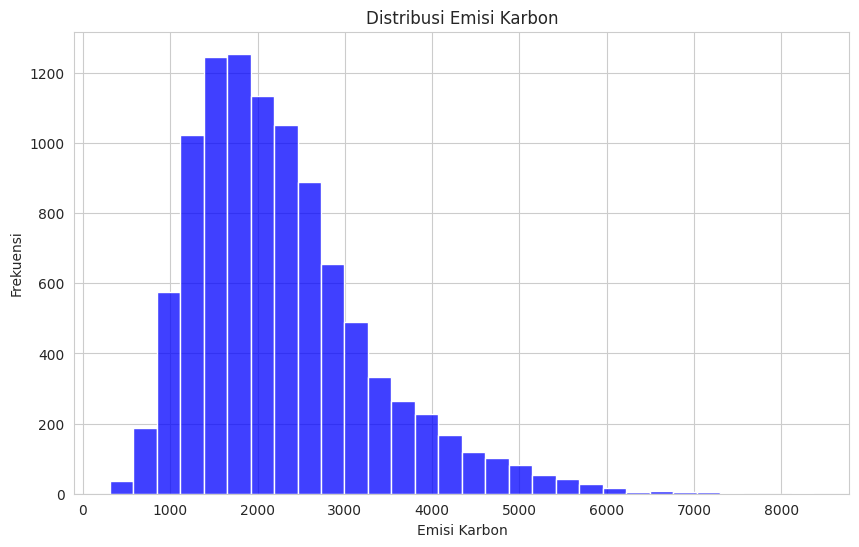

In [19]:
sns.set_style("whitegrid")

# Histogram dari Carbon Emissions
plt.figure(figsize=(10, 6))
sns.histplot(data_1['CarbonEmission'], color='blue', bins=30)
plt.title('Distribusi Emisi Karbon')
plt.xlabel('Emisi Karbon')
plt.ylabel('Frekuensi')
plt.show()

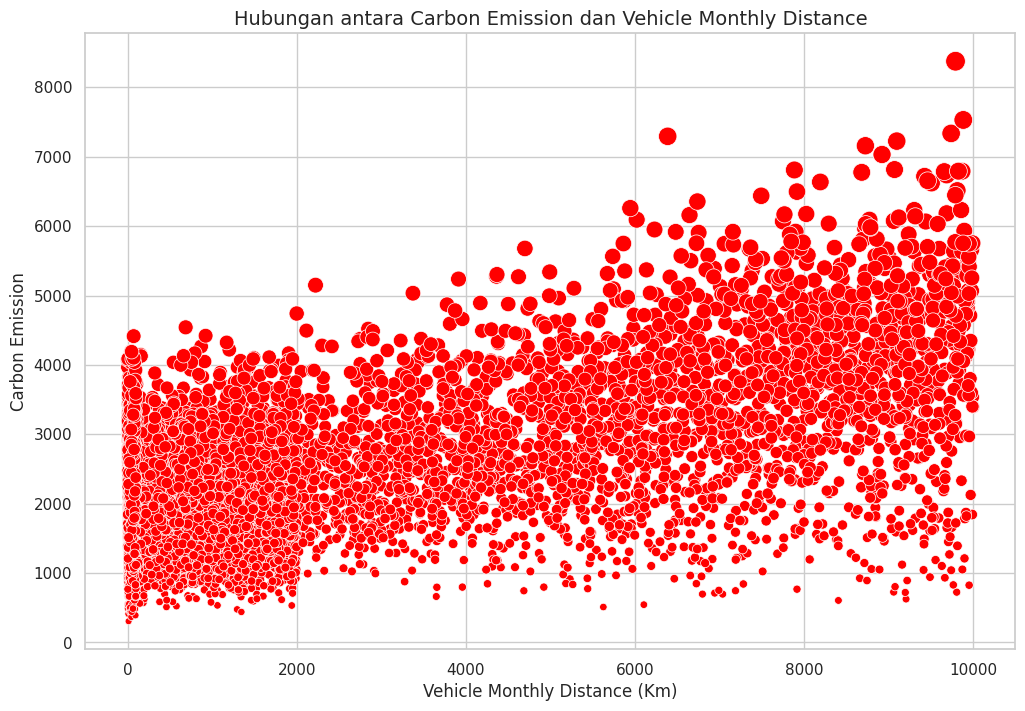

In [20]:
# Hubungan Vehicle Monthly Distance dengan Carbon Emission
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Vehicle Monthly Distance Km',
                y='CarbonEmission',
                data=data_1,
                color='red',
                size='CarbonEmission',
                sizes=(25, 200),
                legend=False)
plt.xlabel('Vehicle Monthly Distance (Km)', fontsize=12)
plt.ylabel('Carbon Emission', fontsize=12)
plt.title('Hubungan antara Carbon Emission dan Vehicle Monthly Distance', fontsize=14)
plt.show()

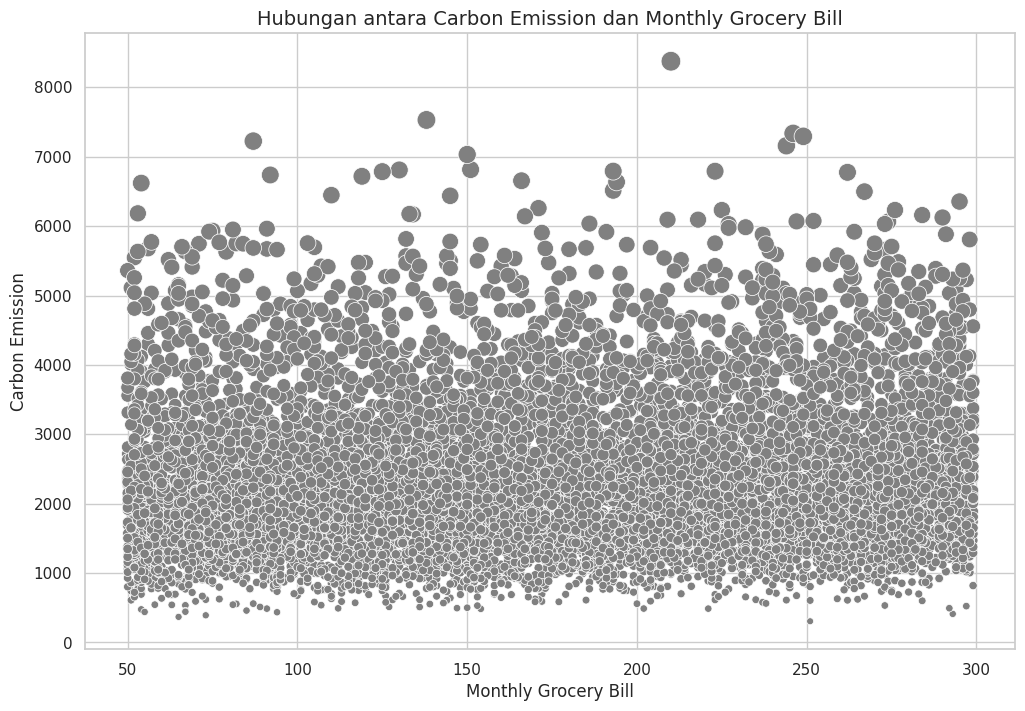

In [21]:
# Hubungan Monthly Grocery Bill dengan Carbon Emission
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Monthly Grocery Bill',
                y='CarbonEmission',
                data=data_1,
                color='grey',
                size='CarbonEmission',
                sizes=(25, 200),
                legend=False)
plt.xlabel('Monthly Grocery Bill', fontsize=12)
plt.ylabel('Carbon Emission', fontsize=12)
plt.title('Hubungan antara Carbon Emission dan Monthly Grocery Bill', fontsize=14)
plt.show()

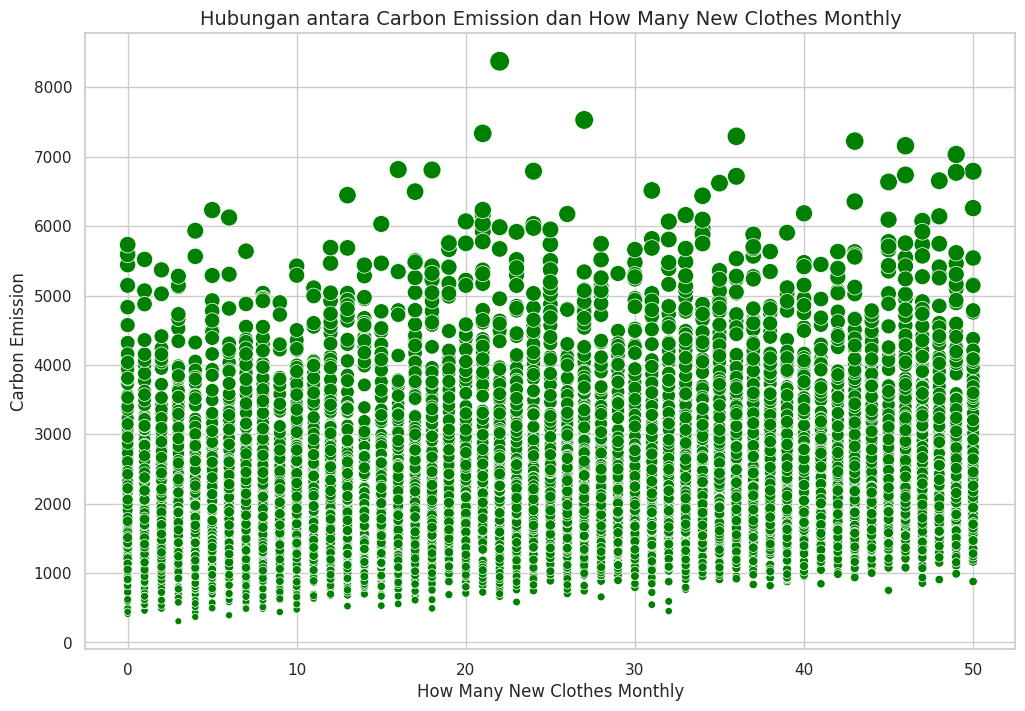

In [22]:
# Hubungan How Many New Clothes Monthlyl dengan Carbon Emission
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.scatterplot(x='How Many New Clothes Monthly',
                y='CarbonEmission',
                data=data_1,
                color='green',
                size='CarbonEmission',
                sizes=(25, 200),
                legend=False)
plt.xlabel('How Many New Clothes Monthly', fontsize=12)
plt.ylabel('Carbon Emission', fontsize=12)
plt.title('Hubungan antara Carbon Emission dan How Many New Clothes Monthly', fontsize=14)
plt.show()

<ipython-input-23-884f3b2741bf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x=category, y='CarbonEmission', data=data_1, palette="Wistia")
<ipython-input-23-884f3b2741bf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x=category, y='CarbonEmission', data=data_1, palette="Wistia")
<ipython-input-23-884f3b2741bf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x=category, y='CarbonEmission', data=data_1, palette="Wistia")


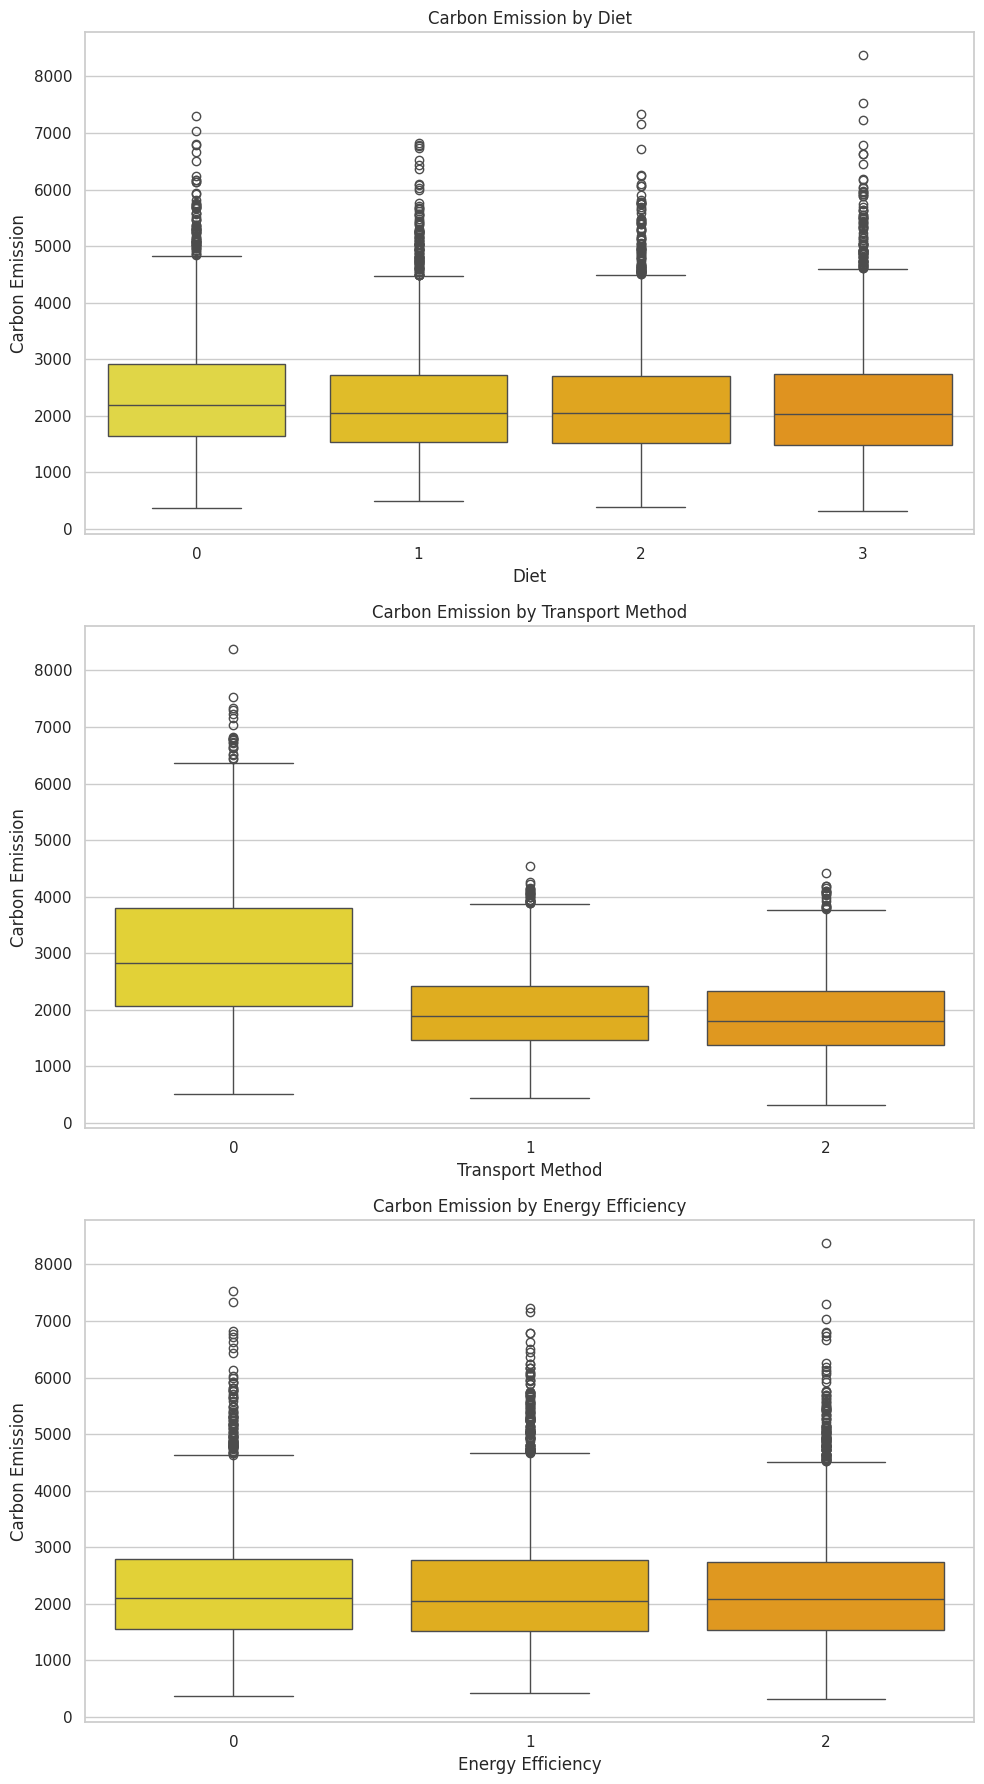

In [23]:
categories = ['Diet', 'Transport', 'Energy efficiency']
titles = [
    'Carbon Emission by Diet',
    'Carbon Emission by Transport Method',
    'Carbon Emission by Energy Efficiency'
]
x_labels = ['Diet', 'Transport Method', 'Energy Efficiency']
y_label = 'Carbon Emission'

fig, axes = plt.subplots(len(categories), 1, figsize=(10, 18))

for i, category in enumerate(categories):
    sns.boxplot(ax=axes[i], x=category, y='CarbonEmission', data=data_1, palette="Wistia")
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(x_labels[i])
    axes[i].set_ylabel(y_label)

plt.tight_layout()
plt.show()

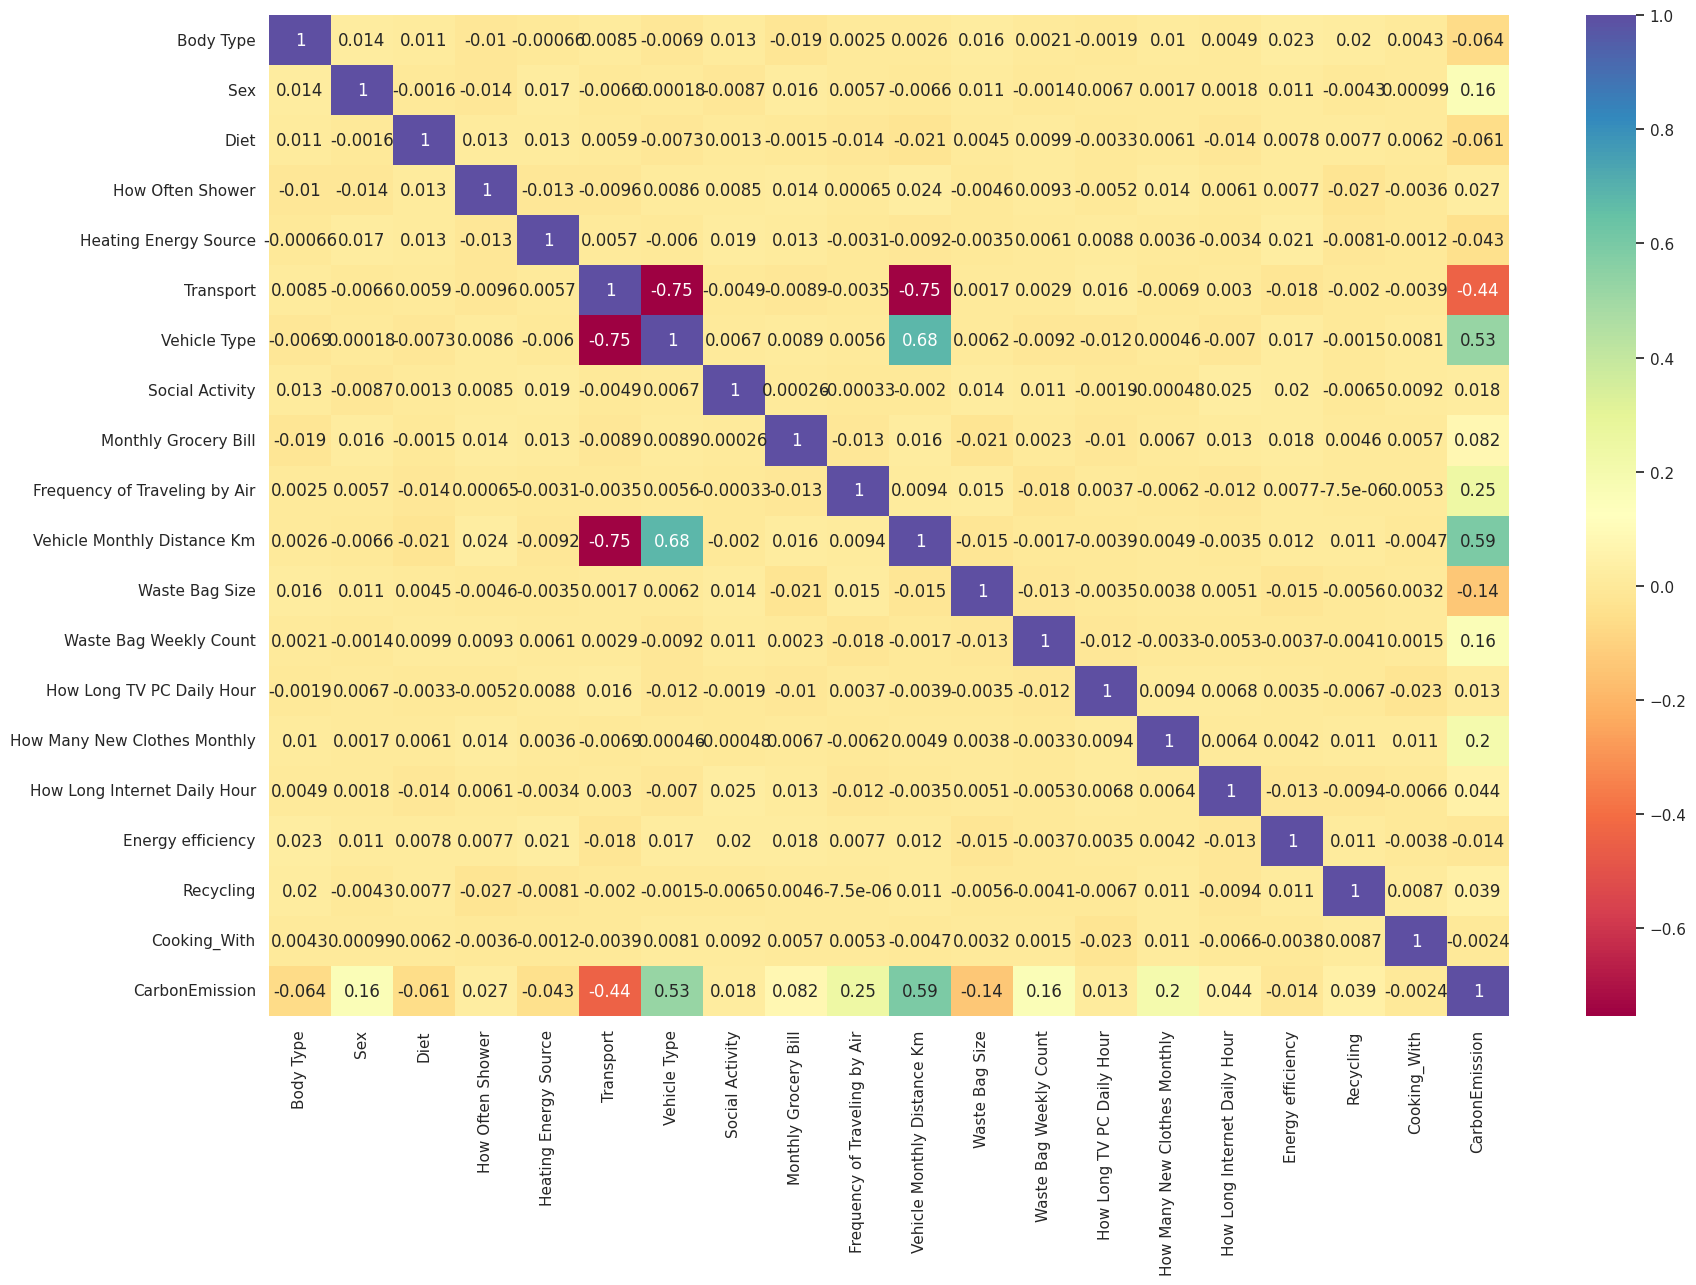

In [24]:
#Melihat korelasi antar fitur
correlations = data_1.corr(method='pearson')
plt.figure(figsize=(20, 13))
sns.heatmap(correlations, cmap="Spectral", annot=True)
plt.show()

### Modeling

Split Data

In [25]:
X = data_1.iloc[:, :-1].values
y = data_1.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

print("X_train size : ", X_train.shape[0])
print("X_test size : ", X_test.shape[0],'\n')

print("y_train size : ", y_train.shape[0])
print("y_test size : ", y_test.shape[0],'\n')

X_train size :  8000
X_test size :  2000 

y_train size :  8000
y_test size :  2000 



Standarisasi Dataset

In [26]:
#standarisasi
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Model XGB

In [27]:
xgbregression = XGBRegressor()
xgbregression.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
y_xgb = xgbregression.predict(X_test)

In [29]:
#Menghitung R2 Score
dfR2 = {
    "Model": ["XGB Regression"],
    "R2 Score": [r2_score(y_test, y_xgb)]
}
score_df = pd.DataFrame(dfR2)
print("R-Squared Metrics:")
print(score_df)

R-Squared Metrics:
            Model  R2 Score
0  XGB Regression  0.975729


In [30]:
#Menghitung MAE Score
dfMAE = {
    "Model": ["XGB Regression"],
    "MAE Score": [mean_absolute_error(y_test, y_xgb)]
}
score_df2 = pd.DataFrame(dfMAE)
print("R-Squared Metrics:")
print(score_df2)

R-Squared Metrics:
            Model   MAE Score
0  XGB Regression  120.023525


Model menggunakan TF Architectur

In [31]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(256, activation='relu', input_shape=(19,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 662,529 (2.53 MB)

 Trainable params: 662,529 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#Compile model
model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error'])

Latih Model

In [34]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 1006.5670 - mean_absolute_error: 1006.5670
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 343.9314 - mean_absolute_error: 343.9314
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 298.8838 - mean_absolute_error: 298.8838
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 254.6396 - mean_absolute_error: 254.6396
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 233.3647 - mean_absolute_error: 233.3647
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 220.8955 - mean_absolute_error: 220.8955
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 221.6703 - mean_absolute_error: 221.6703
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 206.5921 - mean_absolute_error: 206.5921
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 191.9792 - mean_absolute_error: 191.9792
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 167.340

In [35]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE:{test_mae}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 121.7505 - mean_absolute_error: 121.7505
Test Loss: 122.0234603881836, Test MAE:122.0234603881836


In [36]:
y_tf = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [37]:
mean_absolute_error(y_test, y_tf)

122.02345365905762

Melihat R2 Score model

r2 score model MLP  0.9766227006912231


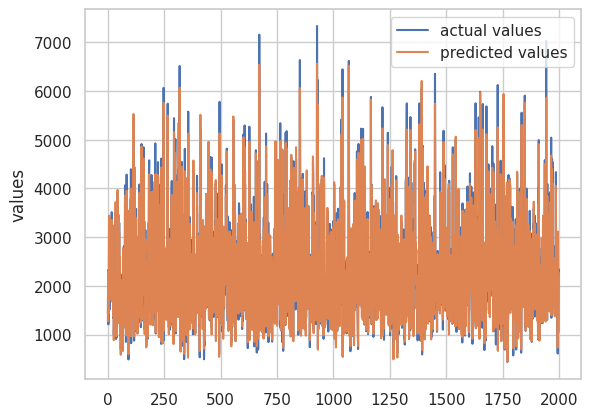

In [38]:
# TF Architecture
print("r2 score model MLP " , r2_score(y_test , y_tf))

import matplotlib.pyplot as plt
plt.plot(range(len(y_test)) , y_test , label = "actual values")
plt.plot(range(len(y_test)) , y_tf , label  = "predicted values")
plt.legend()
plt.ylabel('values')
plt.show()

r2 score model XGB  0.9757285118103027


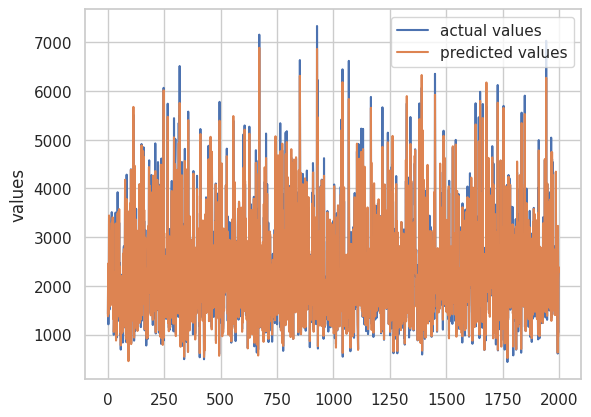

In [39]:
# XGB Regression
print("r2 score model XGB " , r2_score(y_test , y_xgb))

import matplotlib.pyplot as plt
plt.plot(range(len(y_test)) , y_test , label = "actual values")
plt.plot(range(len(y_test)) , y_xgb , label  = "predicted values")
plt.legend()
plt.ylabel('values')
plt.show()

Save Model

In [40]:
from google.colab import files

#save model dalam format hdf5
model.save("model.h5")

files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
# Muat model Keras
mlp_model = tf.keras.models.load_model('model.h5')

# Konversi ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(mlp_model)
tflite_model = converter.convert()

# Simpan model TFLite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

files.download('model.tflite')

Saved artifact at '/tmp/tmp_csjdeb6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 19), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132575659436944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132575479798896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132575612533952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132575612528672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132575941617872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132575479794496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132575659404176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132575659405056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132575480030912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132575659405584: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
import pickle

# Misalnya, Anda memiliki model bernama 'model'
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
import joblib

joblib.dump(sc, 'scaler.pkl')

files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Uji prediksi

In [49]:
import joblib
import numpy as np
from tensorflow.keras.models import load_model

# Muat model dan scaler
mlp_model = load_model('model.h5')
scaler = joblib.load('scaler.pkl')

def predict_emission(input_data):
    input_data = np.array(input_data).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)

    prediction = mlp_model.predict(input_data_scaled)

    return float(prediction)
# Fungsi rekomendasi
def recommend_action(carbon_emission, threshold=4000):

    if carbon_emission > threshold:
        return (
            "Emisi karbon Anda terlalu tinggi, Harap pertimbangkan untuk:\n"
            "- Menggunakan transportasi umum atau kendaraan listrik.\n"
            "- Mengurangi jarak tempuh kendaraan Anda.\n"
            "- Memperbaiki efisiensi energi di rumah atau kantor Anda."
        )
    else:
        return "Emisi karbon Anda berada dalam batas normal. Pertahankan kebiasaan baik Anda!"

In [50]:
# Contoh data input
input_data_user = [1,0,3,1,2,2,0,1,114,2,9,0,3,9,38,5,0,2,9]

# Prediksi emisi karbon
predicted_emission = predict_emission(input_data_user)
# Rekomendasi
recommendation = recommend_action(predicted_emission)

print(f"Prediksi Emisi Karbon: {int(round(predicted_emission))} kgCO₂e. \n")
print("Rekomendasi:")
print(recommendation)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediksi Emisi Karbon: 1844 kgCO₂e. 

Rekomendasi:
Emisi karbon Anda berada dalam batas normal. Pertahankan kebiasaan baik Anda!


<ipython-input-49-2e46d3fbee2c>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(prediction)
